In [2]:
import astropy.units as u
from astropy.coordinates import EarthLocation, solar_system_ephemeris
from astropy.time import Time
from sunpy.coordinates import sun
import numpy as np
import pandas as pd

In [3]:
location = EarthLocation.from_geodetic(-98.5*u.deg, 29.6*u.deg)
max2023 = Time('2023-10-14 16:54')
max2024 = Time('2024-04-08 18:35')

time = max2024

In [4]:
# Define an array of observation times centered around the time of interest
times = time + np.concatenate([np.arange(-120, -5) * u.min,
                                np.arange(-300, 300) * u.s,
                                np.arange(5, 121) * u.min])

# Create an observer coordinate for the time array
observer = location.get_itrs(times)

# Calculate the eclipse amounts using a JPL ephemeris
with solar_system_ephemeris.set('de440s'):
    amount = sun.eclipse_amount(observer)
    amount_minimum = sun.eclipse_amount(observer, moon_radius='minimum')

# Calculate the start/end points of partial/total solar eclipse
partial = np.flatnonzero(amount > 0)
if len(partial) > 0:
    print("Eclipse detected:")
    start_partial, end_partial = times[partial[[0, -1]]]
    print(f"  Partial solar eclipse starts at {start_partial} UTC")

    total = np.flatnonzero(amount_minimum == 1)
    if len(total) > 0:
        start_total, end_total = times[total[[0, -1]]]
        print(f"  Total solar eclipse starts at {start_total} UTC\n"
                f"  Total solar eclipse ends at {end_total} UTC")
    print(f"  Partial solar eclipse ends at {end_partial} UTC")


Eclipse detected:
  Partial solar eclipse starts at 2024-04-08 17:15:00.000 UTC
  Total solar eclipse starts at 2024-04-08 18:33:44.000 UTC
  Total solar eclipse ends at 2024-04-08 18:35:33.000 UTC
  Partial solar eclipse ends at 2024-04-08 19:55:00.000 UTC


In [18]:
# Create dataframe from amount and times
# Convert Python astropy time to regular python datetime
df = pd.DataFrame({'time': times.to_datetime(), 'amount': amount, 'amount_minimum': amount_minimum})
df

,time,amount,amount_minimum
0,2024-04-08 16:35:00,0.0,0.0
1,2024-04-08 16:36:00,0.0,0.0
2,2024-04-08 16:37:00,0.0,0.0
3,2024-04-08 16:38:00,0.0,0.0
4,2024-04-08 16:39:00,0.0,0.0
...,...,...,...
826,2024-04-08 20:31:00,0.0,0.0
827,2024-04-08 20:32:00,0.0,0.0
828,2024-04-08 20:33:00,0.0,0.0
829,2024-04-08 20:34:00,0.0,0.0


<Axes: title={'center': 'Solar Eclipse Amount'}, xlabel='time', ylabel='Eclipse Amount'>

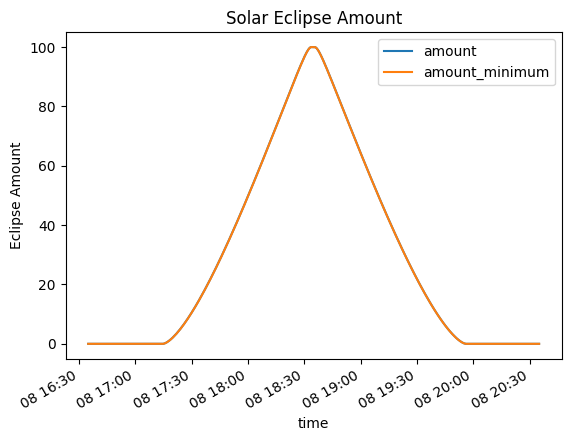

In [20]:
df.plot(x='time', y=['amount', 'amount_minimum'], title='Solar Eclipse Amount', ylabel='Eclipse Amount')